In [64]:
library(tidyverse)
options(repr.plot.width=10, repr.plot.height=6)
theme_set(theme_classic())

# STATS 504
## Week 11: Power, effect size, reproducibility

## False positive psychology

In [134]:
fppsy <- readr::read_csv(file = "http://rpository.com/ds4psy/data/falsePosPsy_all.csv") %>% print

Rows: 78 Columns: 19
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): cond
dbl (18): study, ID, aged, aged365, female, dad, mom, potato, when64, kalimb...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 78 × 19
   study    ID  aged aged365 female   dad   mom potato when64 kalimba cond   
   <dbl> <dbl> <dbl>   <dbl>  <dbl> <dbl> <dbl>  <dbl>  <dbl>   <dbl> <chr>  
 1     1     1  6765    18.5      0    49    45      0      0       1 control
 2     1     2  7715    21.1      1    63    62      0      1       0 64     
 3     1     3  7630    20.9      0    61    59      0      1       0 64     
 4     1     4  7543    20.7      0    54    51      0      0       1 control
 5     1     5  7849    21.5      0    47    43      0      1       0 64     
 6     1     6  7581    20.8      1    49    50      0      1       0 64     
 7     1     7  7534    20.6      1    56    55      0      0       1 control
 8     1     8  6678    18.3      1    45    45      0      1       0 64     
 9     1     9  6970    19.1      0    53    51      1      0       0 potato 
10     1    10  7681    21.0      0    53    51      0      1       0 64     
# ℹ 68 more rows
# ℹ 8 more variables: root 

In [164]:
# study 1

            Df Sum Sq Mean Sq F value Pr(>F)  
dad          1  0.020  0.0201   0.060 0.8077  
cond         1  1.680  1.6797   5.058 0.0329 *
Residuals   27  8.967  0.3321                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [181]:
# study 2
fppsy %>% filter(study == 2) %>% filter(!potato) %>% 
    lm(aged365 ~ dad + cond, data = .) %>%
    aov %>% summary

            Df Sum Sq Mean Sq F value Pr(>F)   
dad          1  22.80  22.798  11.758 0.0032 **
cond         1   9.54   9.543   4.922 0.0404 * 
Residuals   17  32.96   1.939                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Researcher DOF

How likely is a false positive if I can choose among several dependent variables to report?

In [205]:
sim.A <- function() {
    X <- rnorm(n=20)
    Y <- .5 * X + sqrt(1 - .5^2) * rnorm(n=20)
    pv <- list(X, Y, (X + Y / 2)) %>% map_dbl(\(v) t.test(v)$p.value)
    min(pv) < 0.05
}

replicate(sim.A(), n = 10000) %>% mean()

[1] 0.0959

What if I can collect additional data?

In [207]:
sim.B <- function() {
    X <- rnorm(n=20)
    Y <- c(X, rnorm(n = 10))
    pv <- list(X, Y) %>% map_dbl(\(v) t.test(v)$p.value)
    min(pv) < 0.05
}

replicate(sim.B(), n = 10000) %>% mean()

[1] 0.0729

## Beauty and sex ratio at birth

In [177]:
y <- c(0.5, 0.56, 0.5, 0.53, 0.44)
x <- 1:5
df <- tibble(y=y, x=x)
lm(y ~ x, data = df) %>% summary


Call:
lm(formula = y ~ x, data = df)

Residuals:
     1      2      3      4      5 
-0.036  0.039 -0.006  0.039 -0.036 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.55100    0.04560  12.084  0.00122 **
x           -0.01500    0.01375  -1.091  0.35502   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04347 on 3 degrees of freedom
Multiple R-squared:  0.2841,	Adjusted R-squared:  0.04545 
F-statistic:  1.19 on 1 and 3 DF,  p-value: 0.355


`geom_smooth()` using formula = 'y ~ x'


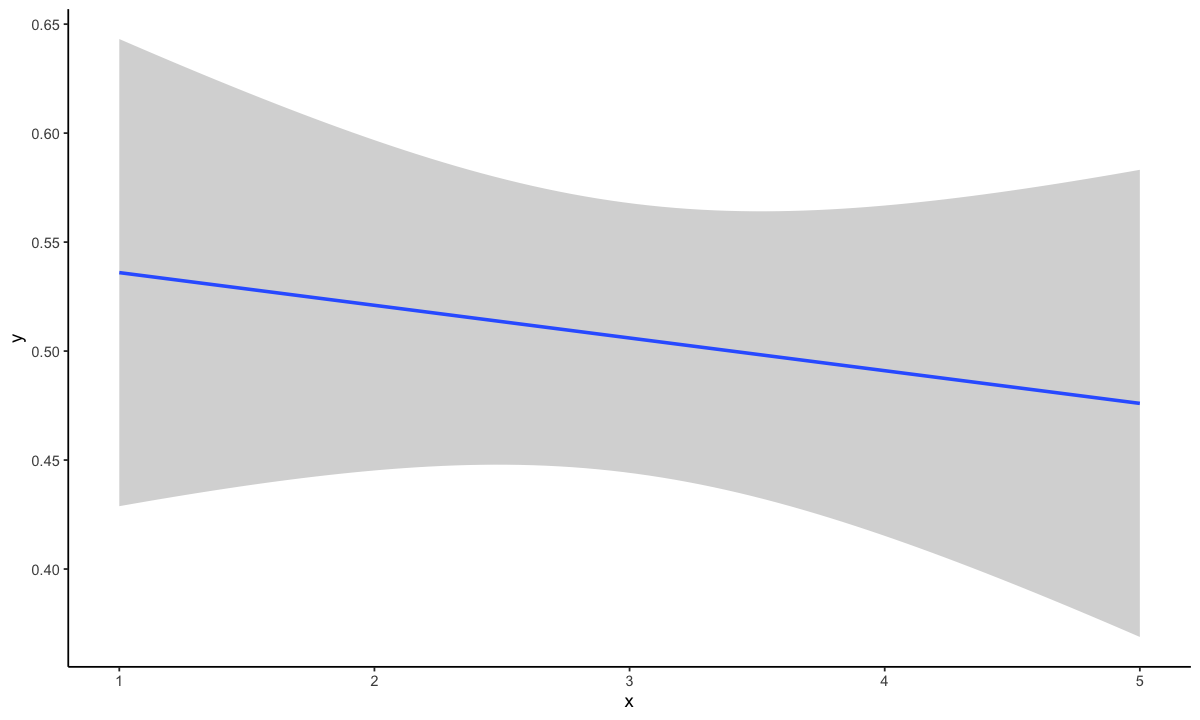

In [102]:
ggplot(df, aes(x=x, y=y)) + geom_smooth(method="lm")

In [218]:
library(rstanarm)

fit <- stan_glm(y ~ x,
                data = df,
                prior = normal(0, 1), # |beta| <= 0.01 with high prob
                family = gaussian())

summary(fit)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.28 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.058 seconds (Warm-up)
Chain 1:                0.044 seconds (Sampling)
Chain 1:                0.10


Model Info:
 function:     stan_glm
 family:       gaussian [identity]
 formula:      y ~ x
 algorithm:    sampling
 sample:       4000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 5
 predictors:   2

Estimates:
              mean   sd   10%   50%   90%
(Intercept) 0.5    0.1  0.5   0.6   0.6  
x           0.0    0.0  0.0   0.0   0.0  
sigma       0.1    0.0  0.0   0.0   0.1  

Fit Diagnostics:
           mean   sd   10%   50%   90%
mean_PPD 0.5    0.0  0.5   0.5   0.5  

The mean_ppd is the sample average posterior predictive distribution of the outcome variable (for details see help('summary.stanreg')).

MCMC diagnostics
              mcse Rhat n_eff
(Intercept)   0.0  1.0  1996 
x             0.0  1.0  2034 
sigma         0.0  1.0  1440 
mean_PPD      0.0  1.0  2901 
log-posterior 0.0  1.0  1056 

For each parameter, mcse is Monte Carlo standard error, n_eff is a crude measure of effective sample size, and Rhat is the potential scale reduction fac

In [105]:
# library(readxl)
# download.file('http://stat.columbia.edu/~gelman/research/beautiful/beautiful%20people%20kids2.xls', 'bp.xls')
# read_excel('bp.xls')
bp <- read_csv("bp.csv") %>% print

New names:
• `` -> `...5`
• `` -> `...6`
Rows: 300 Columns: 6
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Person
dbl (3): sons, daughters, year
lgl (2): ...5, ...6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 300 × 6
   Person              sons daughters  year ...5  ...6 
   <chr>              <dbl>     <dbl> <dbl> <lgl> <lgl>
 1 Amy Brenneman          1         1  1995 NA    NA   
 2 Babyface               2         0  1995 NA    NA   
 3 Brad Pitt              0         1  1995 NA    NA   
 4 Cara Oculato          NA        NA  1995 NA    NA   
 5 Carlos Betancourt      0         0  1995 NA    NA   
 6 Chiara Mastroianni     1         1  1995 NA    NA   
 7 Claudia Schiffer       1         1  1995 NA    NA   
 8 Courteney Cox          0         1  1995 NA    NA   
 9 Debrah Farentino       0         2  1995 NA    NA   
10 Demi Moore             0         3  1995 NA    NA   
# ℹ 290 more rows


In [91]:
bp %>% group_by(year) %>% summarize(across(sons:daughters, \(v) sum(v, na.rm = T))) %>% print
prop.test(24, 24 + 36) 

# A tibble: 6 × 3
   year  sons daughters
  <dbl> <dbl>     <dbl>
1  1995    24        32
2  1996    35        45
3  1997    35        24
4  1998    25        21
5  1999    30        23
6  2000    25        29



	1-sample proportions test with continuity correction

data:  24 out of 24 + 36, null probability 0.5
X-squared = 2.0167, df = 1, p-value = 0.1556
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.2782717 0.5345461
sample estimates:
  p 
0.4 


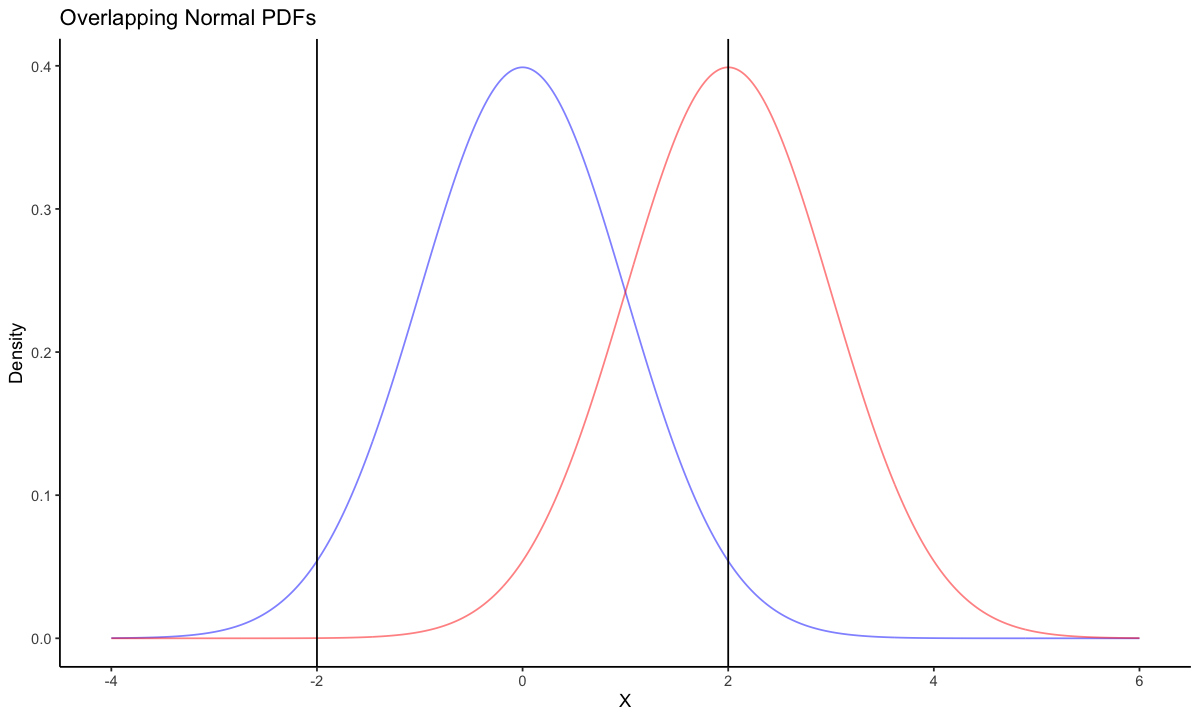

In [133]:
# library(ggplot2)
# library(dplyr)

# # Generate data for normal PDFs
# x_values <- seq(-4, 6, by = 0.01)
# normal_data <- expand.grid(x = x_values, mean = c(0, 2)) %>%
#   mutate(density = dnorm(x, mean = mean, sd = 1),
#          color = if_else(mean == 0, "blue", "red"))

# # Plot
# ggplot(normal_data, aes(x = x, y = density, group = factor(mean), fill = factor(mean))) +
#   geom_line(alpha = 0.5, aes(color = factor(mean))) +
#   geom_vline(xintercept = c(-2, 2)) +
#   scale_fill_manual(values = c("0" = "blue", "2" = "red")) +
#   scale_color_manual(values = c("0" = "blue", "2" = "red")) +
#   labs(title = "Overlapping Normal PDFs", x = "X", y = "Density") +
#   theme_classic() +
#   guides(fill = FALSE, color = FALSE) # Remove legend